# Tutorial Rpy2

## Arnaldo D' Amaral Pereira Granja Russo
## github.com/arnaldorusso

## ciclotux.org
## institutobotoflipper.org
## datasounds.org

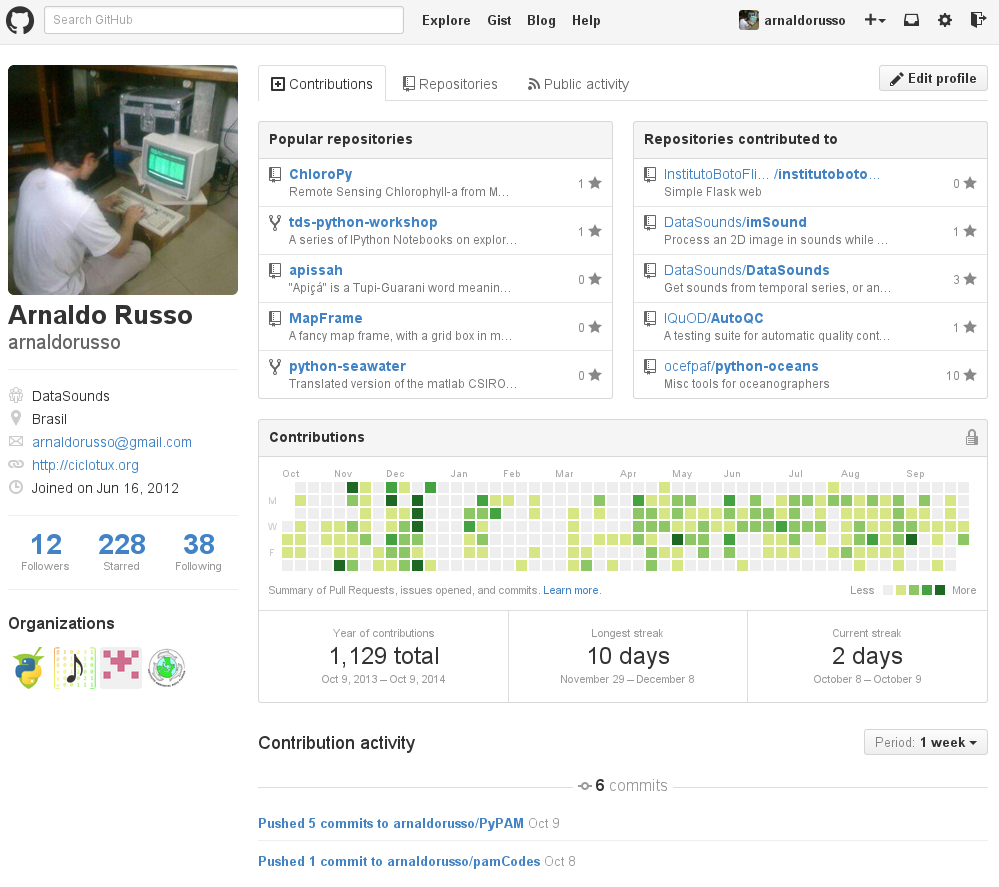

In [1]:
from IPython.display import Image
Image(filename='antes.png', width=600)

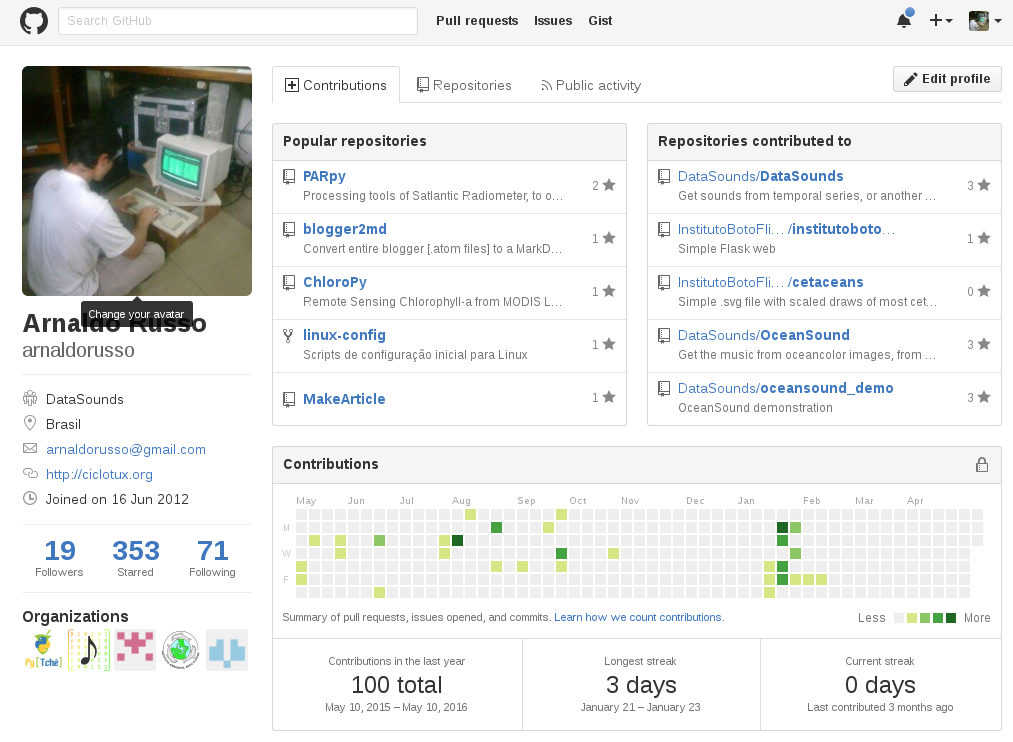

In [2]:
Image(filename='depois.png', width=600)

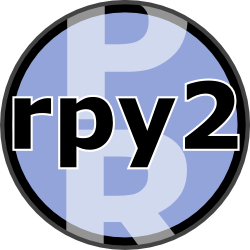

In [3]:
Image(filename='rpy2_logo.png', width=400)

# Requerimentos

* https://github.com/fernandomayer/linux-config


## Basicamente:
* apt-get install -y build-essential gobjc gobjc++ \
	gobjc-multilib gobjc++-multilib gfortran-multilib \
	gcc-multilib g++-multilib automake autoconf gawk \
	openmpi-common libopenmpi libopenmpi-dev \
	libsprng2 libsprng2-dev pvm pvm-dev unixodbc unixodbc-bin \
	gdal-bin libgdal-dev libproj-dev curl bwidget markdown pandoc
    

* apt-get build-dep -y r-base

## Baixar o R e compilar
* http://cran-r.c3sl.ufpr.br/src/base/R-3

* ./configure --enable-R-shlib
* make
* sudo make install

## Instalar o rpy2

* pip install rpy2

### Ou você pode também baixar o rpy2 e compilar

    #descompactar o diretório
    tar -xzf <rpy2_package>.tar.gz
    cd <rpy2_package>
    python setup.py install

## Testando a instalação

    python -m 'rpy2.tests'

In [44]:
# Começando a brincar

import rpy2.robjects as robjects

# Pacotes comuns no R
packnames = ('ggplot2', 'hexbin')

# import módulo rpy2
import rpy2.robjects.packages as rpackages

if all(rpackages.isinstalled(x) for x in packnames):
    have_tutorial_packages = True
else:
    have_tutorial_packages = False

In [45]:
have_tutorial_packages

True

## Download dos Pacotes R, por dentro do Python usando `rpy2

In [46]:
if not have_tutorial_packages:
    # Pacote de utilidades do R
    utils = rpackages.importr('utils')
    # Seleciona um espelho de rede
    utils.chooseCRANmirror(ind=1) # Seleciona o primeiro espelho
else:
    print("Ok, tá tudo certo!")


# Usando o install.packages() 
# Função do R para instalar pacotes
    
if not have_tutorial_packages:
    # Vetor de Strings do R
    from rpy2.robjects.vectors import StrVector
    # Arquivos
    packnames_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
    if len(packnames_to_install) > 0:
        utils.install_packages(StrVector(packnames_to_install))

Ok, tá tudo certo!


## Continuando a brincadeira

### A instância do R 
### O objeto _*r*_ no _*rpy2.robjects*_ representa uma sessão do R

### Terminal R
#### >  pi
#### [1] 3.141593

In [6]:
pi = robjects.r('pi')
pi[0]

3.141592653589793

In [7]:
## Operando valores R
# pi é uma lista onde tem os seus atributos (Também chamado de FLoatVector)
pi

<FloatVector - Python:0x7fa8035cdcf8 / R:0x4c45958>
[3.141593]

In [8]:
# Desse Modo, o que se espera se fizermos
# pi + 2 ??

## Usando funções R dentro do Python

In [9]:
robjects.r('''
    f <- function(r, verbose=FALSE) {
        if (verbose) {
            cat("Estou chamando f().\n")
        }
        2 * pi * r
        }
        f(3)
''')

<FloatVector - Python:0x7fa8036b35a8 / R:0x79987b8>
[18.849556]

In [10]:
r_f = robjects.globalenv['f']
print(r_f.r_repr())

function (r, verbose = FALSE) 
{
    if (verbose) {
        cat("Estou chamando f().\n")
    }
    2 * pi * r
}


## Como usar isso dentro do Python?

In [11]:
# A função dentro do R multiplica 2 * pi * r
r_f(3)


<FloatVector - Python:0x7fa80362d2d8 / R:0x4ae9258>
[18.849556]

In [12]:
v = robjects.FloatVector([1.1, 2.2, 3.3, 4.4, 5.5, 6.6])
m = robjects.r['matrix'](v, nrow = 2)
print(m)

     [,1] [,2] [,3]
[1,]  1.1  3.3  5.5
[2,]  2.2  4.4  6.6



In [13]:
# Chamando funções nativas do R
rsum = robjects.r['sum']
rsum(v)

<FloatVector - Python:0x7fa8035ee3b0 / R:0x57fe308>
[23.100000]

## Plots nativos do R

In [47]:
r = robjects.r

x = robjects.IntVector(range(10))
y = r.rnorm(10)

# é necessário instanciar a Interface
## rpy2.rinterface.NULL
r.X11()

r.layout(r.matrix(robjects.IntVector([1,2,3,2]), nrow=2, ncol=2))
r.plot(r.runif(10), x, xlab="runif", ylab="foo/bar", col="red")


rpy2.rinterface.NULL

In [48]:
r['dev.off']()
# Serve para fechar a figura

<IntVector - Python:0x7fcd32b15098 / R:0xbd74208>
[       1]

## Importando e carregando pacotes específicos do R

In [10]:
# Importando pacotes a serem instalados
from rpy2.robjects.packages import importr
utils = importr("utils")
utils.install_packages('vegan')



--- Please select a CRAN mirror for use in this session ---


/home/arnaldo/.virtualenvs/rpy/local/lib/python2.7/site-packages/rpy2-2.7.9-py2.7-linux-x86_64.egg/rpy2/robjects/functions.py:106: UserWarning: Installing package into ‘/home/arnaldo/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/home/arnaldo/.virtualenvs/rpy/local/lib/python2.7/site-packages/rpy2-2.7.9-py2.7-linux-x86_64.egg/rpy2/robjects/functions.py:106: UserWarning: Warning:
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/home/arnaldo/.virtualenvs/rpy/local/lib/python2.7/site-packages/rpy2-2.7.9-py2.7-linux-x86_64.egg/rpy2/robjects/functions.py:106: UserWarning:  failed to download mirrors file (cannot download all files); using local file '/usr/local/lib/R/doc/CRAN_mirrors.csv'

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/home/arnaldo/.virtualenvs/rpy/local/lib/python2.7/site-packages/rpy2-2.7.9-py2.7-linux-x86_64.egg/rpy2/robjects/functions.py:106: UserWarning:  u

rpy2.rinterface.NULL

In [11]:
# Importar pacotes específicos - Análises ecológicas (ex. vegan)
vegan = importr('vegan')

In [12]:
# PEDINDO AJUDA AO "R"

from rpy2.robjects.packages import importr
utils = importr("utils")
help_pack = utils.help("help")

# exibe a saída do help
str(help_pack)

R Help on ‘help’help                   package:utils                   R Documentation

_D_o_c_u_m_e_n_t_a_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     ‘help’ is the primary interface to the help systems.

_U_s_a_g_e:

     help(topic, package = NULL, lib.loc = NULL,
          verbose = getOption("verbose"),
          try.all.packages = getOption("help.try.all.packages"),
          help_type = getOption("help_type"))
     
_A_r_g_u_m_e_n_t_s:

   topic: usually, a name or character string specifying the topic for
          which help is sought.  A character string (enclosed in
          explicit single or double quotes) is always taken as naming a
          topic.

          If the value of ‘topic’ is a length-one character vector the
          topic is taken to be the value of the only element.
          Otherwise ‘topic’ must be a name or a reserved word (if
          syntactically valid) or character string.

          See ‘Details’ for what happens i

''

In [13]:
help_pack = utils.help('vegan')
str(help_pack)

R Help on ‘vegan’vegan-package              package:vegan               R Documentation

_C_o_m_m_u_n_i_t_y _E_c_o_l_o_g_y _P_a_c_k_a_g_e: _O_r_d_i_n_a_t_i_o_n, _D_i_v_e_r_s_i_t_y _a_n_d _D_i_s_s_i_m_i_l_a_r_i_t_i_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     The ‘vegan’ package provides tools for descriptive community
     ecology. It has most basic functions of diversity analysis,
     community ordination and dissimilarity analysis. Most of its
     multivariate tools can be used for other data types as well.

_D_e_t_a_i_l_s:

     The functions in the ‘vegan’ package contain tools for diversity
     analysis, ordination methods and tools for the analysis of
     dissimilarities. Together with the ‘labdsv’ package, the ‘vegan’
     package provides most standard tools of descriptive community
     analysis. Package ‘ade4’ provides an alternative comprehensive
     package, and several other packages complement ‘vegan

''

## Importando um DataSet - R e Python

In [15]:
# IMPORTANDO UM DATASET
from rpy2.robjects.packages import importr

# Para importar datasets padrão do R (ex. iris, mtcars, etc)
datasets = importr('datasets')
utils = importr('utils')
tmp_env = robjects.Environment()
utils.data('mtcars', envir = tmp_env)
mtcars = tmp_env['mtcars']

In [16]:
# mostra os tipos
mtcars.rownames

<StrVector - Python:0x7fcd4121e098 / R:0x5494e50>
[str, str, str, ..., str, str, str]

In [77]:
# Mostra os nomes
str(mtcars.rownames)

' [1] "Mazda RX4"           "Mazda RX4 Wag"       "Datsun 710"         \n [4] "Hornet 4 Drive"      "Hornet Sportabout"   "Valiant"            \n [7] "Duster 360"          "Merc 240D"           "Merc 230"           \n[10] "Merc 280"            "Merc 280C"           "Merc 450SE"         \n[13] "Merc 450SL"          "Merc 450SLC"         "Cadillac Fleetwood" \n[16] "Lincoln Continental" "Chrysler Imperial"   "Fiat 128"           \n[19] "Honda Civic"         "Toyota Corolla"      "Toyota Corona"      \n[22] "Dodge Challenger"    "AMC Javelin"         "Camaro Z28"         \n[25] "Pontiac Firebird"    "Fiat X1-9"           "Porsche 914-2"      \n[28] "Lotus Europa"        "Ford Pantera L"      "Ferrari Dino"       \n[31] "Maserati Bora"       "Volvo 142E"         \n'

In [78]:
#r['nome_da_funcao_R], Executa a função R

print(r['summary'](mtcars))

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

## Fazendo Figuras com o R

In [ ]:
# PACOTES GRÁFICOS - ggplot

import rpy2.robjects.lib.ggplot2 as ggplot2
     
pp = ggplot2.ggplot(mtcars) + \
     ggplot2.aes_string(x='hp', y='carb', col='factor(cyl)') + \
     ggplot2.geom_point() + \
     ggplot2.geom_smooth(ggplot2.aes_string(group = 'cyl'),
                         method = 'lm')
     #ggplot2.aes_string(x='wt', y='mpg', col='factor(cyl)') + \

pp.plot()


r['dev.off']()

In [49]:
r['dev.off']()

<IntVector - Python:0x7fa7e1e04d40 / R:0xe17f128>
[       1]

In [18]:
# Figura simples

r = robjects.r

x = robjects.IntVector(range(10))
y = r.rnorm(10)

r.X11()

# Separando as partes das figura
r.layout(r.matrix(robjects.IntVector([1,2,3,2]), nrow=2, ncol=2))
r.plot(r.runif(10), x, xlab="runif", ylab="foo/bar", col="red")


rpy2.rinterface.NULL

In [19]:
r.plot(r.runif(10), x, xlab="runif", ylab="foo/bar", col="red")

rpy2.rinterface.NULL

In [20]:
r.plot(r.runif(10), x, xlab="runif", ylab="foo/bar", col="red")

rpy2.rinterface.NULL

In [22]:
r['dev.off']()

<IntVector - Python:0x7fcd41247560 / R:0xa784c78>
[       1]

## Inspecionando elementos dos DataFrame

In [23]:
mtcars??

## Siglas do DataFrame mtcars

[, 1]	mpg	Miles/(US) gallon

[, 2]	cyl	Number of cylinders

[, 3]	disp	Displacement (cu.in.)

[, 4]	hp	Gross horsepower

[, 5]	drat	Rear axle ratio

[, 6]	wt	Weight (1000 lbs)

[, 7]	qsec	1/4 mile time

[, 8]	vs	V/S

[, 9]	am	Transmission (0 = automatic, 1 = manual)

[,10]	gear	Number of forward gears

[,11]	carb	Number of carburetors

In [26]:
# Acessando elementos do DataFrame

mtcars.rx('cyl')

<DataFrame - Python:0x7fcd513b2560 / R:0xb272e08>
[FloatVector]
  cyl: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x7fcd522f9128 / R:0x5471330>
[6.000000, 6.000000, 4.000000, ..., 6.000000, 8.000000, 4.000000]

In [27]:
print(mtcars.rx('cyl'))

                    cyl
Mazda RX4             6
Mazda RX4 Wag         6
Datsun 710            4
Hornet 4 Drive        6
Hornet Sportabout     8
Valiant               6
Duster 360            8
Merc 240D             4
Merc 230              4
Merc 280              6
Merc 280C             6
Merc 450SE            8
Merc 450SL            8
Merc 450SLC           8
Cadillac Fleetwood    8
Lincoln Continental   8
Chrysler Imperial     8
Fiat 128              4
Honda Civic           4
Toyota Corolla        4
Toyota Corona         4
Dodge Challenger      8
AMC Javelin           8
Camaro Z28            8
Pontiac Firebird      8
Fiat X1-9             4
Porsche 914-2         4
Lotus Europa          4
Ford Pantera L        8
Ferrari Dino          6
Maserati Bora         8
Volvo 142E            4



In [30]:
print(mtcars.rx(2))

                    cyl
Mazda RX4             6
Mazda RX4 Wag         6
Datsun 710            4
Hornet 4 Drive        6
Hornet Sportabout     8
Valiant               6
Duster 360            8
Merc 240D             4
Merc 230              4
Merc 280              6
Merc 280C             6
Merc 450SE            8
Merc 450SL            8
Merc 450SLC           8
Cadillac Fleetwood    8
Lincoln Continental   8
Chrysler Imperial     8
Fiat 128              4
Honda Civic           4
Toyota Corolla        4
Toyota Corona         4
Dodge Challenger      8
AMC Javelin           8
Camaro Z28            8
Pontiac Firebird      8
Fiat X1-9             4
Porsche 914-2         4
Lotus Europa          4
Ford Pantera L        8
Ferrari Dino          6
Maserati Bora         8
Volvo 142E            4



In [32]:
# Usando índices Python

print(mtcars.rx()[1])

 [1] 6 6 4 6 8 6 8 4 4 6 6 8 8 8 8 8 8 4 4 4 4 8 8 8 8 4 4 4 8 6 8 4



## Convertendo DataFrames entre R e Python

In [76]:
# Convertendo os DataFrames entre R para Python

from rpy2.robjects import pandas2ri

mtcars_py = pandas2ri.ri2py_dataframe(mtcars)

mtcars_py.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0


In [88]:
# Importando direto pelo nome do banco de dados do R
from rpy2 import robjects
r= robjects.r

mtcars_py = pandas2ri.ri2py(r['mtcars'])
iris_py = pandas2ri.ri2py(r['iris'])

iris_py.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [89]:
# Esse era o jeito antigo de se importar DataFrames do R

import pandas.rpy.common as com

iris = com.load_data('iris')
iris.head()

/home/arnaldo/.virtualenvs/rpy/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html
  if __name__ == '__main__':


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [56]:
#Criando um DataFrame com Pandas e convertendo para usá-lo com o Rpy2

import pandas as pd
import pandas.rpy.common as com
import rpy2.robjects as ro
from rpy2.robjects.packages import importr

d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

db_py = pd.DataFrame(d)

db_r = com.convert_to_r_dataframe(db_py)

print(db_py)
print('------------')
print(db_r)

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0
------------
  one two
a   1   1
b   2   2
c   3   3
d  NA   4




## Algumas análises estatísticas


In [37]:
import rpy2.robjects as robjects

r = robjects.r

m = r.matrix(r.rnorm(100), ncol=5)
pca = r.princomp(m)
r.plot(pca, main="Eigen values")

rpy2.rinterface.NULL

In [39]:
r.biplot(pca, main="biplot")

rpy2.rinterface.NULL

In [40]:
r['dev.off']()

<IntVector - Python:0x7fcd6003fb00 / R:0xa27a6c8>
[       1]

In [41]:
# Apesar do R importar os pacotes básicos diretamente, a maneira mais detalhada seria:

from rpy2.robjects.packages import importr

base     = importr('base')
stats    = importr('stats')
graphics = importr('graphics')

m = base.matrix(stats.rnorm(100), ncol = 5)
pca = stats.princomp(m)
graphics.plot(pca, main = "Eigen values")


rpy2.rinterface.NULL

In [42]:
stats.biplot(pca, main = "biplot")

rpy2.rinterface.NULL

In [53]:
r['dev.off']()

<IntVector - Python:0x7fcd32ac45f0 / R:0xb7cfbe8>
[       1]

## Regressão Linear

%%R Code

x <- c(1,2,3,4,5)

y <- c(2,1,3,5,4)

M <- lm(y~x)

summary(M)$coefficients

            Estimate Std. Error  t value  Pr(>|t|)

(Intercept)      0.6  1.1489125 0.522233 0.6376181

x                0.8  0.3464102 2.309401 0.1040880


## Automatizando conversões

In [79]:
import pandas as pd
from rpy2 import robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

r = robjects.r

df = pd.DataFrame({'x': [1,2,3,4,5], 
                   'y': [2,1,3,5,4]})

fit = r.lm('y~x', data=df)
print(r.summary(fit))

# Para imprimir somente os coeficientes
#print(r.summary(M).rx2('coefficients'))


Call:
(function (formula, data, subset, weights, na.action, method = "qr", 
    model = TRUE, x = FALSE, y = FALSE, qr = TRUE, singular.ok = TRUE, 
    contrasts = NULL, offset, ...) 
{
    ret.x <- x
    ret.y <- y
    cl <- match.call()
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data", "subset", "weights", "na.action", 
        "offset"), names(mf), 0L)
    mf <- mf[c(1L, m)]
    mf$drop.unused.levels <- TRUE
    mf[[1L]] <- quote(stats::model.frame)
    mf <- eval(mf, parent.frame())
    if (method == "model.frame") 
        return(mf)
    else if (method != "qr") 
        warning(gettextf("method = '%s' is not supported. Using 'qr'", 
            method), domain = NA)
    mt <- attr(mf, "terms")
    y <- model.response(mf, "numeric")
    w <- as.vector(model.weights(mf))
    if (!is.null(w) && !is.numeric(w)) 
        stop("'weights' must be a numeric vector")
    offset <- as.vector(model.offset(mf))
    if (!is.null(offset)) {
        if (length(offse

In [80]:
# Caso queira acessar algum elemento do Modelo Linear
print(fit.names)

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        



In [90]:
#Acessando os residuos
residuals = fit.rx2('residuals')
print(residuals)

            0             1             2             3             4 
 6.000000e-01 -1.200000e+00 -2.775558e-16  1.200000e+00 -6.000000e-01 



In [86]:
# Usando os residuos com Python
residuals_py = np.array(residuals)

#ou
#residuals_py = pandas2ri.ri2py(residuals)

Populating the interactive namespace from numpy and matplotlib


(array([ 1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([-1.2 , -0.96, -0.72, -0.48, -0.24,  0.  ,  0.24,  0.48,  0.72,
         0.96,  1.2 ]),
 <a list of 10 Patch objects>)

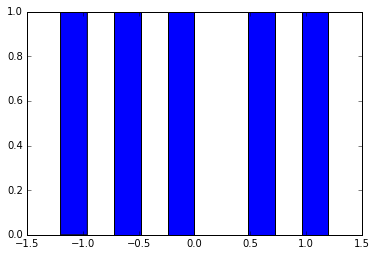

In [87]:
%pylab inline
hist(residuals_py)

In [50]:
r.X11()
r.plot(df)

rpy2.rinterface.NULL

In [51]:
r.abline(fit)

rpy2.rinterface.NULL

In [54]:
# Se formos fazer o mesmo de dentro do Python, usando o rpy diretamente,
# isso pode fica um pouco mais longo.

from rpy2.robjects import IntVector, Formula
from rpy2.robjects.packages import importr
stats = importr('stats')

x = robjects.IntVector((1,2,3,4,5))
y = robjects.IntVector((2,1,3,5,4))

fmla = Formula('y ~ x')
env = fmla.environment
env['x'] = x
env['y'] = y

fit = stats.lm(fmla)

print(r.summary(fit).rx('coefficients'))

$coefficients
            Estimate Std. Error  t value  Pr(>|t|)
(Intercept)      0.6  1.1489125 0.522233 0.6376181
x                0.8  0.3464102 2.309401 0.1040880




In [60]:
# Utilizando `pystatsmodels` para fazer o mesmo.

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

x = np.array([1,2,3,4,5])
y = np.array([2,1,3,5,4])

d = dict(x=x, y=y)

result = smf.ols('x~y', d)
fit = result.fit()

fit.summary()

/home/arnaldo/.virtualenvs/rpy/local/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     5.333
Date:                Dom, 15 Mai 2016   Prob (F-statistic):              0.104
Time:                        16:28:05   Log-Likelihood:                -6.2734
No. Observations:                   5   AIC:                             16.55
Df Residuals:                       3   BIC:                             15.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6000      1.149      0.522      0.638        -3.056     4.256
y              0.8000      0.346      2.309      0.104        -0.302     1.902
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.352
Skew:                          -0.000   Prob(JB):                        0.839
Kurtosis:                       1.700   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Se você não quisesse atribuir a fórmula e fazer diretamente...
# Aqui você pode saber mais detalhadamente como os parâmetros são estabelecidos
# http://connor-johnson.com/2014/02/18/linear-regression-with-python/

import numpy as np
import statsmodels.api as sm

x = np.array([1,2,3,4,5])
y = np.array([2,1,3,5,4])

result = sm.OLS(x,y)
fit = result.fit()

print('http://connor-johnson.com/2014/02/18/linear-regression-with-python/')
fit.summary()

http://connor-johnson.com/2014/02/18/linear-regression-with-python/


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     52.02
Date:                Dom, 15 Mai 2016   Prob (F-statistic):            0.00196
Time:                        16:36:11   Log-Likelihood:                -6.4910
No. Observations:                   5   AIC:                             14.98
Df Residuals:                       4   BIC:                             14.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9636      0.134      7.212      0.002         0.593     1.335
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.402
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.627
Skew:                           0.000   Prob(JB):                        0.731
Kurtosis:                       1.265   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Populating the interactive namespace from numpy and matplotlib


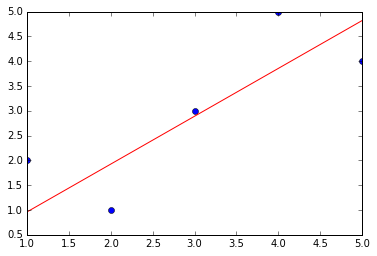

In [66]:
%pylab inline

# calcular pontos modelados, para a reta de regressão
X = np.linspace(x.min(), x.max(), 100)

plot(x, y, 'bo')
plt.plot(X, fit.predict(X), 'r')

In [104]:
# Mais informações sobre Modelos lineares podem ser obtidas nesse tutorial:
from IPython.display import HTML, display_html
HTML('<iframe src=https://www.github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb width=700 height=350></iframe>')
#print('https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb')

## História do *Rpy2* vs *rpy*

In [103]:
HTML('<iframe src=http://www.ciclotux.org width=900 height=550></iframe>')